# Laboratorio Curación de Datos

En este laboratorio usaremos el set de datos sugerido durante la clase 4: "San Francisco Building Permits". para realizar la curación de datos, supondremos que  el análisis que se quiere realizar sobre los datos tiene como objetivo determinar el tiempo que tomará obtener un permiso de construcción solicitado para la construcción/refacción/ampliación de casas y/o oficinas.

## 1 - Importando los Datos

In [17]:
# Importamos las librerías necesarias
import numpy as np
 
import pandas as pd
import numpy as np
from hashlib import md5
from sklearn import preprocessing

pd.set_option('display.max_columns', 500)
np.random.seed(0)


Gracias a la documentación provista en Kaggle, sabemos que las columnas 'Permit Creation Date', 'Issued Date',
'Current Status Date', 'Completed Date','First Construction Document Date','Permit Expiration Date'
'Filed Date' son de tipo Date, por lo que intentaremos parsearlas al cargar los datos.

In [14]:
#Leemos el set de datos
bpermits = pd.read_csv('Building_Permits.csv',
                    parse_dates=['Permit Creation Date','Current Status Date','Filed Date','Issued Date','Completed Date','First Construction Document Date','Permit Expiration Date'],
                    index_col=['Permit Number'], low_memory=False)

In [20]:
# Analizamos el tamaño y la forma del dataset: 
bpermits.shape

(198900, 42)

In [21]:
bpermits.sample(5)

Permit Type            Permit Type Definition  \
Permit Number                                                  
201403039652             8            otc alterations permit   
201510159735             3  additions alterations or repairs   
M409787                  8            otc alterations permit   
201411191888             8            otc alterations permit   
M527228                  8            otc alterations permit   

              Permit Creation Date Block  Lot  Street Number  \
Permit Number                                                  
201403039652            2014-03-03  3732  008            400   
201510159735            2015-10-15  2609  028             79   
M409787                 2013-07-22  4624  031            178   
201411191888            2014-11-19  0039  109            294   
M527228                 2014-10-14  1251  002            707   

              Street Number Suffix  Street Name Street Suffix  Unit  \
Permit Number                                                         
201403039652                   NaN   Clementina            St   NaN   
201510159735                   NaN  Buena Vista            Tr   NaN   
M409787                        NaN   West Point            Rd   NaN   
201411191888                   NaN    Francisco            St   0.0   
M527228                        NaN         Cole            St   NaN   

              Unit Suffix                                        Description  \
Permit Number                                                                  
201403039652          NaN  evacuation maps floors basement to roof. maher...   
201510159735          NaN  revision to pa# 2015/06/03/7991. 1st floor: lo...   
M409787               NaN  create two addresses to existing building at b...   
201411191888          NaN  to obtain final inspection for work approved u...   
M527228               NaN                                street space permit   

              Current Status Current Status Date Filed Date Issued Date  \
Permit Number                                                             
201403039652       withdrawn          2014-04-16 2014-03-03         NaT   
201510159735        complete          2017-08-18 2015-10-15  2016-01-21   
M409787               issued          2013-07-22 2013-07-22  2013-07-22   
201411191888          issued          2014-11-19 2014-11-19  2014-11-19   
M527228               issued          2014-10-14 2014-10-14  2014-10-14   

              Completed Date First Construction Document Date  \
Permit Number                                                   
201403039652             NaT                              NaT   
201510159735      2017-08-18                       2016-01-21   
M409787                  NaT                       2013-07-22   
201411191888             NaT                       2014-11-19   
M527228                  NaT                       2014-10-14   

              Structural Notification  Number of Existing Stories  \
Permit Number                                                       
201403039652                      NaN                         NaN   
201510159735                      NaN                         3.0   
M409787                           NaN                         NaN   
201411191888                      NaN                         3.0   
M527228                           NaN                         NaN   

               Number of Proposed Stories Voluntary Soft-Story Retrofit  \
Permit Number                                                             
201403039652                          9.0                           NaN   
201510159735                          3.0                           NaN   
M409787                               NaN                           NaN   
201411191888                          3.0                           NaN   
M527228                               NaN                           NaN   

              Fire Only Permit Permit Expiration Date  Estimated C

In [22]:
# Analizamos los tipos de datos de las columnas
bpermits.dtypes

Permit Type                                        int64
Permit Type Definition                            object
Permit Creation Date                      datetime64[ns]
Block                                             object
Lot                                               object
Street Number                                      int64
Street Number Suffix                              object
Street Name                                       object
Street Suffix                                     object
Unit                                             float64
Unit Suffix                                       object
Description                                       object
Current Status                                    object
Current Status Date                       datetime64[ns]
Filed Date                                datetime64[ns]
Issued Date                               datetime64[ns]
Completed Date                            datetime64[ns]
First Construction Document Dat

In [23]:
# Tomamos una muestra de los datos para validar su formato
bpermits.head(5)

Permit Type            Permit Type Definition  \
Permit Number                                                  
201505065519             4                      sign - erect   
201604195146             4                      sign - erect   
201605278609             3  additions alterations or repairs   
201611072166             8            otc alterations permit   
201611283529             6                       demolitions   

              Permit Creation Date Block  Lot  Street Number  \
Permit Number                                                  
201505065519            2015-05-06  0326  023            140   
201604195146            2016-04-19  0306  007            440   
201605278609            2016-05-27  0595  203           1647   
201611072166            2016-11-07  0156  011           1230   
201611283529            2016-11-28  0342  001            950   

              Street Number Suffix Street Name Street Suffix  Unit  \
Permit Number                                                        
201505065519                   NaN       Ellis            St   NaN   
201604195146                   NaN       Geary            St   0.0   
201605278609                   NaN     Pacific            Av   NaN   
201611072166                   NaN     Pacific            Av   0.0   
201611283529                   NaN      Market            St   NaN   

              Unit Suffix                                        Description  \
Permit Number                                                                  
201505065519          NaN  ground fl facade: to erect illuminated, electr...   
201604195146          NaN            remove (e) awning and associated signs.   
201605278609          NaN                    installation of separating wall   
201611072166          NaN           repair dryrot & stucco at front of bldg.   
201611283529          NaN  demolish retail/office/commercial 3-story buil...   

              Current Status Current Status Date Filed Date Issued Date  \
Permit Number                                                             
201505065519         expired          2017-12-21 2015-05-06  2015-11-09   
201604195146          issued          2017-08-03 2016-04-19  2017-08-03   
201605278609       withdrawn          2017-09-26 2016-05-27         NaT   
201611072166        complete          2017-07-24 2016-11-07  2017-07-18   
201611283529          issued          2017-12-01 2016-11-28  2017-12-01   

              Completed Date First Construction Document Date  \
Permit Number                                                   
201505065519             NaT                       2015-11-09   
201604195146             NaT                       2017-08-03   
201605278609             NaT                              NaT   
201611072166      2017-07-24                       2017-07-18   
201611283529             NaT                       2017-11-20   

              Structural Notification  Number of Existing Stories  \
Permit Number                                                       
201505065519                      NaN                         6.0   
201604195146                      NaN                         7.0   
201605278609                      NaN                         6.0   
201611072166                      NaN                         2.0   
201611283529                      NaN                         3.0   

               Number of Proposed Stories Voluntary Soft-Story Retrofit  \
Permit Number                                                             
201505065519                          NaN                           NaN   
201604195146                          NaN                           NaN   
201605278609                          6.0                           NaN   
201611072166                          2.0                           NaN   
201611283529                          NaN                           NaN   

              Fire Only Permit Permit Expiration Date  Estimated Cost  \


### 1.2 -  Validar que no hay datos duplicados

In [24]:
bpermits[bpermits.duplicated()]

Empty DataFrame
Columns: [Permit Type, Permit Type Definition, Permit Creation Date, Block, Lot, Street Number, Street Number Suffix, Street Name, Street Suffix, Unit, Unit Suffix, Description, Current Status, Current Status Date, Filed Date, Issued Date, Completed Date, First Construction Document Date, Structural Notification, Number of Existing Stories, Number of Proposed Stories, Voluntary Soft-Story Retrofit, Fire Only Permit, Permit Expiration Date, Estimated Cost, Revised Cost, Existing Use, Existing Units, Proposed Use, Proposed Units, Plansets, TIDF Compliance, Existing Construction Type, Existing Construction Type Description, Proposed Construction Type, Proposed Construction Type Description, Site Permit, Supervisor District, Neighborhoods - Analysis Boundaries, Zipcode, Location, Record ID]
Index: []

### 1.3 - Despersonalizar datos

Si bien en este dataset no tenemos datos sensibles, realizaremos un trabajo de anonimización de los datos siguiendo estos hipotéticos:

- El estudio de los datos no debe identificar la ubicación del inmueble
- Para el análisis que se realizará la ubicación exacta del inmueble es irrelevante
- Sin embargo, es necesario poder agrupar por barrios y/o calles la información, sin necesidad de saber el nombre o del barrio o calle

En este caso la forma más sencilla de realizar esta tarea es aplicando una función de hash sobre las siguientes columnas:

- Block
- Street Name
- Neighborhoods - Analysis Boundaries
- Zip Code

Y eliminar las siguientes columnas:

- Location
- Street Number

In [25]:
# Quitamos ubicación de los inmuebles
bpermits.drop(['Street Number'], axis=1, inplace=True)
bpermits.drop(['Location'], axis=1, inplace=True)

In [26]:
# Definimos función para convertir los valores a string y luego realizar el encoding a utf-8
def hashit(val):
    return md5(str(val).encode('utf-8'))

In [27]:
# Aplicamos el hashing a múltiples columnas
cols = ['Street Name','Neighborhoods - Analysis Boundaries','Block','Zipcode']
bpermits[cols] = bpermits[cols].applymap(hashit)


In [28]:
bpermits.sample(5)

Permit Type            Permit Type Definition  \
Permit Number                                                  
201409105988             3  additions alterations or repairs   
201601046309             8            otc alterations permit   
201707212672             3  additions alterations or repairs   
201503171100             8            otc alterations permit   
201502208860             8            otc alterations permit   

              Permit Creation Date                                   Block  \
Permit Number                                                                
201409105988            2014-09-10  <md5 HASH object @ 0x0000021588E950F8>   
201601046309            2016-01-04  <md5 HASH object @ 0x0000021589082148>   
201707212672            2017-07-21  <md5 HASH object @ 0x000002158929EC88>   
201503171100            2015-03-17  <md5 HASH object @ 0x0000021588F4CDC8>   
201502208860            2015-02-20  <md5 HASH object @ 0x0000021588F32030>   

                Lot Street Number Suffix  \
Permit Number                              
201409105988    027                  NaN   
201601046309   001H                  NaN   
201707212672    004                  NaN   
201503171100    009                  NaN   
201502208860    023                  NaN   

                                          Street Name Street Suffix  Unit  \
Permit Number                                                               
201409105988   <md5 HASH object @ 0x0000021581F525D0>            St   0.0   
201601046309   <md5 HASH object @ 0x000002158310F760>            St   0.0   
201707212672   <md5 HASH object @ 0x000002158332C2D8>            St   NaN   
201503171100   <md5 HASH object @ 0x000002158200A418>            Av   NaN   
201502208860   <md5 HASH object @ 0x0000021581FEF648>            Av   NaN   

              Unit Suffix                                        Description  \
Permit Number                                                                  
201409105988          NaN  horizontal addition to ground floor rear of sg...   
201601046309          NaN  replace 48 vinyl windows with aluminum-colad w...   
201707212672          NaN  adding stairwell @ rear yard to connect lower ...   
201503171100          NaN  enlarge garage door to 10 feet. replace garage...   
201502208860          NaN  refurbish / repair dry rot at front sashes, 5....   

              Current Status Current Status Date Filed Date Issued Date  \
Permit Number                                                             
201409105988          issued          2016-05-04 2014-09-10  2016-05-04   
201601046309        complete          2016-05-13 2016-01-04  2016-01-04   
201707212672           filed          2017-07-21 2017-07-21         NaT   
201503171100          issued          2015-03-31 2015-03-17  2015-03-31   
201502208860        complete          2015-03-10 2015-02-20  2015-02-20   

              Completed Date First Construction Document Date  \
Permit Number                                                   
201409105988             NaT                       2016-05-04   
201601046309      2016-05-13                       2016-01-04   
201707212672             NaT                              NaT   
201503171100             NaT                       2015-03-31   
201502208860      2015-03-10                       2015-02-20   

              Structural Notification  Number of Existing Stories  \
Permit Number                                                       
201409105988                        Y                         3.0   
201601046309                      NaN                         3.0   
201707212672                        Y                         3.0   
201503171100                      NaN                         2.0   
201502208860                      NaN                         2.0   

               Number of Proposed Stories Voluntary Soft-Story Retrofit  \
Permit Number                                                       

### 1.4 - No modificar los datos originales

In [29]:
# Guardamos la información

bpermits.to_csv("building_permits_anon.csv")

## 2 - Limpiando Datos

In [30]:
datos = pd.read_csv('building_permits_anon.csv',
                    parse_dates=['Permit Creation Date','Current Status Date','Filed Date','Issued Date','Completed Date','First Construction Document Date','Permit Expiration Date'],
                    index_col=['Permit Number'], low_memory=False)

In [31]:
datos.shape

(198900, 40)

### 2.1 - Etiquetas de Columnas, quitar caracteres especiales

In [32]:
datos.sample(5) 

Permit Type            Permit Type Definition  \
Permit Number                                                  
M781047                  8            otc alterations permit   
201402249186             8            otc alterations permit   
201701308240             8            otc alterations permit   
M742272                  8            otc alterations permit   
201410249817             3  additions alterations or repairs   

              Permit Creation Date                                   Block  \
Permit Number                                                                
M781047                 2017-04-26  <md5 HASH object @ 0x00000215892404E0>   
201402249186            2014-02-24  <md5 HASH object @ 0x0000021588DC87D8>   
201701308240            2017-01-30  <md5 HASH object @ 0x0000021589300198>   
M742272                 2016-11-29  <md5 HASH object @ 0x00000215891CB990>   
201410249817            2014-10-24  <md5 HASH object @ 0x0000021588EC4C10>   

               Lot Street Number Suffix  \
Permit Number                             
M781047        003                  NaN   
201402249186   023                  NaN   
201701308240   001                  NaN   
M742272        003                  NaN   
201410249817   042                  NaN   

                                          Street Name Street Suffix   Unit  \
Permit Number                                                                
M781047        <md5 HASH object @ 0x00000215832CDAD0>            St    NaN   
201402249186   <md5 HASH object @ 0x0000021581E85DF0>            St  208.0   
201701308240   <md5 HASH object @ 0x000002158338D7B0>            St    NaN   
M742272        <md5 HASH object @ 0x0000021583258FA8>            St    NaN   
201410249817   <md5 HASH object @ 0x0000021581F82260>            St    0.0   

              Unit Suffix                                        Description  \
Permit Number                                                                  
M781047               NaN                                street space permit   
201402249186          NaN  remove tub, new shower valve, prep and tile ne...   
201701308240          NaN  unit#7 & 17. to comply with complaint#20175692...   
M742272               NaN                                       street space   
201410249817          NaN  soft story retrofit per sfbc chapter 34b: othe...   

              Current Status Current Status Date Filed Date Issued Date  \
Permit Number                                                             
M781047               issued          2017-04-26 2017-04-26  2017-04-26   
201402249186        complete          2014-04-24 2014-02-24  2014-02-24   
201701308240        complete          2018-01-11 2017-01-30  2017-01-30   
M742272               issued          2016-11-29 2016-11-29  2016-11-29   
201410249817        complete          2015-04-30 2014-10-24  2014-12-05   

              Completed Date First Construction Document Date  \
Permit Number                                                   
M781047                  NaT                       2017-04-26   
201402249186      2014-04-24                       2014-02-24   
201701308240      2018-01-11                       2017-01-30   
M742272                  NaT                       2016-11-29   
201410249817      2015-04-30                       2014-12-05   

              Structural Notification  Number of Existing Stories  \
Permit Number                                                       
M781047                           NaN                         NaN   
201402249186                      NaN                         3.0   
201701308240                      NaN                         3.0   
M742272                           NaN                         NaN   
201410249817                      NaN                         3.0   

               Number of Proposed Stories Voluntary Soft-Story Retrofit  \
Permit Number                                                       

In [33]:
# Removemos espacios y guiones 
datos.columns = datos.columns.str.replace('\s+', '')
datos.columns = datos.columns.str.replace('-', '')

In [34]:
datos.sample(5) 

PermitType    PermitTypeDefinition PermitCreationDate  \
Permit Number                                                          
M364887                 8  otc alterations permit         2013-01-07   
201306139491            8  otc alterations permit         2013-06-13   
201510169943            8  otc alterations permit         2015-10-16   
201406249240            8  otc alterations permit         2014-06-24   
201504274727            8  otc alterations permit         2015-04-27   

                                                Block  Lot StreetNumberSuffix  \
Permit Number                                                                   
M364887        <md5 HASH object @ 0x0000021588AA5418>  010                NaN   
201306139491   <md5 HASH object @ 0x0000021588CD7AA8>  010                NaN   
201510169943   <md5 HASH object @ 0x0000021589033E40>  026                NaN   
201406249240   <md5 HASH object @ 0x0000021588E42EE0>  017                NaN   
201504274727   <md5 HASH object @ 0x0000021588F79FD0>  021                NaN   

                                           StreetName StreetSuffix  Unit  \
Permit Number                                                              
M364887        <md5 HASH object @ 0x00000215819F8580>           St   NaN   
201306139491   <md5 HASH object @ 0x0000021581D950F8>           St   NaN   
201510169943   <md5 HASH object @ 0x00000215830C1468>           St   NaN   
201406249240   <md5 HASH object @ 0x0000021581F00440>           St   NaN   
201504274727   <md5 HASH object @ 0x0000021582037620>           Av   NaN   

              UnitSuffix                                        Description  \
Permit Number                                                                 
M364887              NaN                                       street space   
201306139491         NaN  legalize bedrooms, family rooms, laundry and b...   
201510169943         NaN  fire alarm t.i. to 7/f- install new (17) speak...   
201406249240         NaN  rev. to pa#201310119132, add one restroom at e...   
201504274727         NaN  replace 66 windows on east & north sides of bu...   

              CurrentStatus CurrentStatusDate  FiledDate IssuedDate  \
Permit Number                                                         
M364887              issued        2013-01-07 2013-01-07 2013-01-07   
201306139491       complete        2015-12-02 2013-06-13 2013-06-19   
201510169943       complete        2016-01-14 2015-10-16 2015-10-16   
201406249240       complete        2014-06-30 2014-06-24 2014-06-24   
201504274727         issued        2015-04-27 2015-04-27 2015-04-27   

              CompletedDate FirstConstructionDocumentDate  \
Permit Number                                               
M364887                 NaT                    2013-01-07   
201306139491     2015-12-02                    2013-06-19   
201510169943     2016-01-14                    2015-10-16   
201406249240     2014-06-30                    2014-06-24   
201504274727            NaT                    2015-04-27   

              StructuralNotification  NumberofExistingStories  \
Permit Number                                                   
M364887                          NaN                      NaN   
201306139491                     NaN                      3.0   
201510169943                     NaN                     12.0   
201406249240                     NaN                      1.0   
201504274727                     NaN                      3.0   

               NumberofProposedStories VoluntarySoftStoryRetrofit  \
Permit Number                                                       
M364887                            NaN                        NaN   
201306139491                       3.0                        NaN   
201510169943                      12.0                        NaN   
201406249240                       1.0                        NaN   
201504274727                       3.0                     

### 2.2 - Tratar valores faltantes

#### 2.2.1 - Eliminar columnas con valores nulos

In [35]:
# Obtenemos el total de valores nulos por columna
missing = datos.isnull().sum()
missing

PermitType                                  0
PermitTypeDefinition                        0
PermitCreationDate                          0
Block                                       0
Lot                                         0
StreetNumberSuffix                     196684
StreetName                                  0
StreetSuffix                             2768
Unit                                   169421
UnitSuffix                             196939
Description                               290
CurrentStatus                               0
CurrentStatusDate                           0
FiledDate                                   0
IssuedDate                              14940
CompletedDate                          101709
FirstConstructionDocumentDate           14946
StructuralNotification                 191978
NumberofExistingStories                 42784
NumberofProposedStories                 42868
VoluntarySoftStoryRetrofit             198865
FireOnlyPermit                    

Vemos que hay una gran cantidad de columnas con altos porcentajes de datos faltantes.
En este notebook, tomaremos la decisión de descartar todas aquellas columnas que tengan un porcentaje mayor al 50% de los datos como nulos, ya que creemos que imputar una mayor cantidad de datos sería contraproducente para un análisis. La única excepción será la de la columna "CompletedDate", porque entendemos que los valores faltantes pueden referenciar a proyectos no finalizados y esta es información que puede ser útil en sí misma.

In [36]:
# Listado de columnas donde la cantidad de datos nulos sea mayor al 50% del total de los valores y no sea "CompletedDate"
rowsS2 = datos.shape[0]*0.5;
missing_50 = missing[(missing > rowsS2) & (missing.index != 'CompletedDate')]
missing_50.index

Index(['StreetNumberSuffix', 'Unit', 'UnitSuffix', 'StructuralNotification',
       'VoluntarySoftStoryRetrofit', 'FireOnlyPermit', 'TIDFCompliance',
       'SitePermit'],
      dtype='object')

In [37]:
# Eliminamos todas las columnas obtenidas en el paso anterior
datos.drop(list(missing_50.index), axis=1, inplace=True)

In [38]:
datos.shape

(198900, 32)

#### 2.2.2 - Imputar o eliminar datos

In [39]:
# Realizamos sumatoria de datos nulos por columna
miss = datos.isnull().sum()

# Listamos columnas con 1 o más datos nulos
miss[miss>0].sort_values(ascending=False)

CompletedDate                          101709
PermitExpirationDate                    51880
ExistingUnits                           51538
ProposedUnits                           50911
ExistingConstructionTypeDescription     43366
ExistingConstructionType                43366
ProposedConstructionTypeDescription     43162
ProposedConstructionType                43162
NumberofProposedStories                 42868
NumberofExistingStories                 42784
ProposedUse                             42439
ExistingUse                             41114
EstimatedCost                           38066
Plansets                                37309
FirstConstructionDocumentDate           14946
IssuedDate                              14940
RevisedCost                              6066
StreetSuffix                             2768
SupervisorDistrict                       1717
Description                               290
dtype: int64

ESTIMATEDCOST y REVISEDCOST

Para las columnas *EstimatedCost* y *RevisedCost*, que son variables numéricas continuas, imputaremos los valores nulos con la media

In [40]:
# Imputamos cada columna con el valor de la media de la columna

datos['EstimatedCost'] = datos['EstimatedCost'].fillna((datos['EstimatedCost'].mean()))
datos['RevisedCost'] = datos['RevisedCost'].fillna((datos['RevisedCost'].mean()))


NUMBEROFEXISTINGSTORIES y NUMBEROFPROPOSEDSTORIES

Las variables *NumberofExistingStories* y *NumberofProposedStories*, son numéricas discreta, ambas tienen una cantidad casi igual de valores nulos, es probable que las mismas filas que no tiene una carezcan de la otra. Por otro lado, es probable que se trate del mismo tipo de permisos, veremos primero la descripción para darnos una idea

In [41]:
# Obtenemos la cantidad de casos con NumberofExistingStories y NumberofProposedStories nulos, agrupadas
# por descripción del permiso
datos[datos['NumberofExistingStories'].isnull()|datos['NumberofProposedStories'].isnull()].Description.value_counts()

street space                                                                                                                                                                                                    22161
street space permit                                                                                                                                                                                              7549
streetspace                                                                                                                                                                                                       819
street space & sidewalk repair                                                                                                                                                                                    682
street space w/mta                                                                                                                              

Vemos que practicametne todos los casos se tratan de permisos de cambios/reparaciones sobre veredas y calles, este dato nos sirve para determinar si queremos usar esas filas, en este análisis vamos a suponer que sólo se quieren datos relacionados a refacciones internas de un inmueble, por lo que procederemos a eliminar las filas en las que ambos datos sean nulos.

In [42]:
datos.shape

(198900, 32)

In [43]:
datos.drop(datos[datos['NumberofExistingStories'].isnull() | datos['NumberofProposedStories'].isnull()].index, 
           inplace=True)

In [44]:
datos.shape

(152620, 32)

In [45]:
# Realizamos sumatoria de datos nulos por columna
miss = datos.isnull().sum()

# Listamos columnas con 1 o más datos nulos
miss[miss>0].sort_values(ascending=False)

CompletedDate                          58480
PermitExpirationDate                   12225
FirstConstructionDocumentDate          12225
IssuedDate                             12215
ExistingUnits                           7970
ProposedUnits                           7955
StreetSuffix                            2173
SupervisorDistrict                      1052
ExistingConstructionTypeDescription      583
ExistingConstructionType                 583
ProposedConstructionTypeDescription      307
ProposedConstructionType                 307
ProposedUse                              248
ExistingUse                              175
Description                               75
Plansets                                   1
dtype: int64

ISSUEDDATE, COMPLETEDDATE, FIRSTCONSTRUNCTIONDOCUMENTDATE y PERMITEXPIRATIONDATE

Estas tres variables parecen tener valores nulos por lo general al mismo tiempo, corroboraremos si es el caso 

In [46]:
# Obtenemos cantidad de filas donde las 4 variables son nulas 

datos[datos['PermitExpirationDate'].isnull()&datos['IssuedDate'].isnull() & datos['FirstConstructionDocumentDate'].isnull() & datos['CompletedDate'].isnull()].shape

(12182, 32)

De cualquier manera, al ser nuestro objetivo determinar los tiempos que se tarda en la entrega de un permiso, eliminaremos todos aquellos datos que no tengan un valor en IssuedDate

In [47]:
datos.drop(datos[datos['IssuedDate'].isnull()].index, inplace=True)

In [48]:
datos.shape

(140363, 32)

In [49]:
# Realizamos sumatoria de datos nulos por columna
miss = datos.isnull().sum()

# Listamos columnas con 1 o más datos nulos
miss[miss>0].sort_values(ascending=False)

CompletedDate                          46238
ExistingUnits                           7321
ProposedUnits                           7309
StreetSuffix                            2029
SupervisorDistrict                      1004
ExistingConstructionTypeDescription      536
ExistingConstructionType                 536
ProposedConstructionTypeDescription      271
ProposedConstructionType                 271
ProposedUse                              207
ExistingUse                              141
PermitExpirationDate                      29
FirstConstructionDocumentDate             28
Description                               14
Plansets                                   1
dtype: int64

La mayor parte de las variables que quedan con valores nulos son categóricas, analizaremos las que tienen mayores datos:

EXISTINGUNITS y PROPOSEDUNITS

In [50]:
# Identificamos el uso que se le da a los inmuebles que tienen valores nulos
datos[datos['ExistingUnits'].isnull()].ExistingUse.value_counts().head(10)

office                  4781
retail sales             731
food/beverage hndlng     473
warehouse,no frnitur     165
school                   146
manufacturing             99
clinics-medic/dental      90
church                    86
auto repairs              62
apartments                54
Name: ExistingUse, dtype: int64

In [51]:
datos[datos['ExistingUnits'].isnull()].Description.value_counts()

reroofing                                                                                                                                                                                                                                                                                                       115
provide a new sprinklers monitoring system, water flow and valve monitoring                                                                                                                                                                                                                                      38
reroofing.                                                                                                                                                                                                                                                                                                       16
extension of tie backs, adjacent soldier beam shoring at 935-965 market st u

Por lo que podemos observar, las variables hacen referencia al hecho de si es un edificio que contiene múltiples unidades como departamentos y oficinas, los permisos que tienen valores nulos en su mayoría son de una unidad, o al menos no parece afectar al permiso. Por lo que imputaremos estos datos con el valor 1

In [52]:
datos['ExistingUnits'] = datos['ExistingUnits'].fillna(1)
datos['ProposedUnits'] = datos['ProposedUnits'].fillna(1)

STREETSUFIX

In [53]:
# Analizamos los distintos valores
datos['StreetSuffix'].value_counts()

St    95972
Av    31732
Dr     2696
Bl     2438
Wy     2361
Tr     1069
Ct      575
Pl      373
Ln      267
Rd      227
Hy      190
Pz      182
Pk       94
Cr       81
Al       59
Wk        8
Rw        4
No        2
So        2
Hl        1
Sw        1
Name: StreetSuffix, dtype: int64

Esta es una variable categórica de la cuál a priori no estamos muy seguros de si será útil para el análisis propuesto, pero la cantidad de valores nulos es lo suficientemente baja como para decir conservarla para verificar su posible correlación con el tiempo de entrega de un permiso. En este caso, imputaremos con el valor "ot" para significar "other", una nueva categoría para describir aquellos que desconocemos.

In [54]:
datos['StreetSuffix'] = datos['StreetSuffix'].fillna('Ot')

### 2.3 - Codificar Variables

In [55]:
# listamos las variables que aún tenemos en el set de datos y que son de tipo string
tp = datos.dtypes
tp[tp == 'object']

PermitTypeDefinition                   object
Block                                  object
Lot                                    object
StreetName                             object
StreetSuffix                           object
Description                            object
CurrentStatus                          object
ExistingUse                            object
ProposedUse                            object
ExistingConstructionTypeDescription    object
ProposedConstructionTypeDescription    object
NeighborhoodsAnalysisBoundaries        object
Zipcode                                object
dtype: object

De las variables que aún no hemos eliminado:

- PermitTypeDefinition posee una variable numérica equivalente (PermitType)
- Description no tiene utilidad directa para el análisis, aunque puede servir para entender los valores encontrados en otras columnas, no se descarta pero tampoco podemos codificar esta variable como numérica porque perderia su sentido.
- Block y Lot no tienen utilidad para el análisis que se quiere realizar (así como la numeración del inmueble)
- NeighborhoodsAnalysisBoundaries y Zipcode fueron hasheados en pasos anteriores

- StreetName y StreetSuffix pueden ser codificadas
- ExistingUse y ProposedUse pueden ser codificadas
- CurrentStatus puede ser codificada



In [56]:
# Seleccionamos columnas 
columnas=['StreetName','StreetSuffix','CurrentStatus']

# Creamos label para encoding
le = preprocessing.LabelEncoder()

for col in columnas:
# Fit el encoder a las columnas 
    le.fit(datos[col])
# Aplicamos el encoding
    datos[col + "_ID"] = le.transform(datos[col]) 
    

In [57]:
columnas2=['StreetName_ID','StreetSuffix_ID','CurrentStatus_ID']
display(datos[columnas2].head(5))
display(datos[columnas].head(5))



StreetName_ID  StreetSuffix_ID  CurrentStatus_ID
Permit Number                                                  
201611072166            8383                1                 2
201706149344            8382               17                 5
201706300814            8381                1                 2
201708084249            8380                4                 5
201708165014            8379                1                 5

StreetName StreetSuffix  \
Permit Number                                                        
201611072166   <md5 HASH object @ 0x0000021581D6BF80>           Av   
201706149344   <md5 HASH object @ 0x0000021581D6BF30>           St   
201706300814   <md5 HASH object @ 0x0000021581D6BF08>           Av   
201708084249   <md5 HASH object @ 0x0000021581D6BD00>           Ct   
201708165014   <md5 HASH object @ 0x0000021581D6BBE8>           Av   

              CurrentStatus  
Permit Number                
201611072166       complete  
201706149344         issued  
201706300814       complete  
201708084249         issued  
201708165014         issued

### 2.5 - Verificar la consistencia de las variables

Un dato a tener en cuenta en nuestro análisis, es que no haya fechas de solicitudes de permisos (FiledDate) que ocurran después que la entrega del mismo (IssuedDate)

In [58]:
datos[datos['FiledDate']> datos['IssuedDate']]

Empty DataFrame
Columns: [PermitType, PermitTypeDefinition, PermitCreationDate, Block, Lot, StreetName, StreetSuffix, Description, CurrentStatus, CurrentStatusDate, FiledDate, IssuedDate, CompletedDate, FirstConstructionDocumentDate, NumberofExistingStories, NumberofProposedStories, PermitExpirationDate, EstimatedCost, RevisedCost, ExistingUse, ExistingUnits, ProposedUse, ProposedUnits, Plansets, ExistingConstructionType, ExistingConstructionTypeDescription, ProposedConstructionType, ProposedConstructionTypeDescription, SupervisorDistrict, NeighborhoodsAnalysisBoundaries, Zipcode, RecordID, StreetName_ID, StreetSuffix_ID, CurrentStatus_ID]
Index: []

In [59]:
datos.head(5)

PermitType    PermitTypeDefinition PermitCreationDate  \
Permit Number                                                          
201611072166            8  otc alterations permit         2016-11-07   
201706149344            8  otc alterations permit         2017-06-14   
201706300814            8  otc alterations permit         2017-06-30   
201708084249            8  otc alterations permit         2017-08-08   
201708165014            8  otc alterations permit         2017-08-16   

                                                Block  Lot  \
Permit Number                                                
201611072166   <md5 HASH object @ 0x0000021588A9CBC0>  011   
201706149344   <md5 HASH object @ 0x0000021588A9CC10>  009   
201706300814   <md5 HASH object @ 0x0000021588A9CC38>  020   
201708084249   <md5 HASH object @ 0x0000021588A9CF08>  039   
201708165014   <md5 HASH object @ 0x0000021588A9CF30>  006   

                                           StreetName StreetSuffix  \
Permit Number                                                        
201611072166   <md5 HASH object @ 0x0000021581D6BF80>           Av   
201706149344   <md5 HASH object @ 0x0000021581D6BF30>           St   
201706300814   <md5 HASH object @ 0x0000021581D6BF08>           Av   
201708084249   <md5 HASH object @ 0x0000021581D6BD00>           Ct   
201708165014   <md5 HASH object @ 0x0000021581D6BBE8>           Av   

                                            Description CurrentStatus  \
Permit Number                                                           
201611072166   repair dryrot & stucco at front of bldg.      complete   
201706149344                                  evac maps        issued   
201706300814                                 re-roofing      complete   
201708084249                                 re-roofing        issued   
201708165014                                 re-roofing        issued   

              CurrentStatusDate  FiledDate IssuedDate CompletedDate  \
Permit Number                                                         
201611072166         2017-07-24 2016-11-07 2017-07-18    2017-07-24   
201706149344         2017-07-06 2017-06-14 2017-07-06           NaT   
201706300814         2017-07-12 2017-06-30 2017-06-30    2017-07-12   
201708084249         2017-08-08 2017-08-08 2017-08-08           NaT   
201708165014         2017-08-16 2017-08-16 2017-08-16           NaT   

              FirstConstructionDocumentDate  NumberofExistingStories  \
Permit Number                                                          
201611072166                     2017-07-18                      2.0   
201706149344                     2017-07-06                      5.0   
201706300814                     2017-06-30                      3.0   
201708084249                     2017-08-08                      4.0   
201708165014                     2017-08-16                      2.0   

               NumberofProposedStories PermitExpirationDate  EstimatedCost  \
Permit Number                                                                
201611072166                       2.0           2018-07-13         2000.0   
201706149344                       5.0           2018-07-01         4000.0   
201706300814                       3.0           2018-06-25        12000.0   
201708084249                       4.0           2018-08-08        64650.0   
201708165014                       2.0           2018-02-16         7000.0   

               RevisedCost        ExistingUse  ExistingUnits  \
Permit Number                                                  
201611072166        2000.0  1 family dwelling            1.0   
201706149344        4000.0         apartments          326.0   
201706300814       12000.0         apartments            5.0   
201708084249       64650.0         apartments            9.0   
201708165014        7000.0  1 family dwelling            1.0   

                     ProposedUse  ProposedUnits  Plansets  \
Permit Numbe

# 2.6. Identificar y documentar valores atípicos/outliers

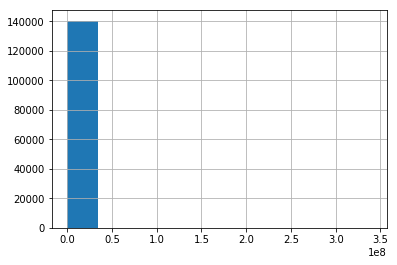

In [60]:
%matplotlib inline
datos.EstimatedCost.hist()


In [61]:

outliers = datos[datos.EstimatedCost > (datos.EstimatedCost.mean() + 3 * datos.EstimatedCost.std())]
outliers


PermitType              PermitTypeDefinition  \
Permit Number                                                 
201301188333            3  additions alterations or repairs   
201301228486            3  additions alterations or repairs   
201303122021            8            otc alterations permit   
201303192489            3  additions alterations or repairs   
201304154538            3  additions alterations or repairs   
201304164667            3  additions alterations or repairs   
201305025984            3  additions alterations or repairs   
201306200106            3  additions alterations or repairs   
201307292946            3  additions alterations or repairs   
201310018188            3  additions alterations or repairs   
201310119141            3  additions alterations or repairs   
201310240180            3  additions alterations or repairs   
201310240180            3  additions alterations or repairs   
201310240180            3  additions alterations or repairs   
201310240183            8            otc alterations permit   
201311041051            3  additions alterations or repairs   
201311071334            3  additions alterations or repairs   
201311222660            3  additions alterations or repairs   
201311262930            3  additions alterations or repairs   
201311273003            8            otc alterations permit   
201312023132            3  additions alterations or repairs   
201312134207            3  additions alterations or repairs   
201312164258            3  additions alterations or repairs   
201312184503            3  additions alterations or repairs   
201312184504            3  additions alterations or repairs   
201312184509            3  additions alterations or repairs   
201312194562            8            otc alterations permit   
201312194614            3  additions alterations or repairs   
201312194661            3  additions alterations or repairs   
201312194666            3  additions alterations or repairs   
...                   ...                               ...   
201505267161            8            otc alterations permit   
201507302929            8            otc alterations permit   
201607152520            3  additions alterations or repairs   
201707273121            8            otc alterations permit   
201512286001            8            otc alterations permit   
201612144877            8            otc alterations permit   
201305106635            3  additions alterations or repairs   
201312174360            3  additions alterations or repairs   
201503060182            3  additions alterations or repairs   
201503201466            3  additions alterations or repairs   
201503312390            3  additions alterations or repairs   
201504012567            3  additions alterations or repairs   
201504012572            3  additions alterations or repairs   
201506058287            3  additions alterations or repairs   
201507020565            8            otc alterations permit   
201507272539            3  additions alterations or repairs   
201504012572            3  additions alterations or repairs   
201504012572            3  additions alterations or repairs   
201608084429            8            otc alterations permit   
201611152731            3  additions alterations or repairs   
201703312940            3  additions alterations or repairs   
201706098944            3  additions alterations or repairs   
201707111557            3  additions alterations or repairs   
201708084273            8            otc alterations permit   
201708144787            8            otc alterations permit   
201708296308            8            otc alterations permit   
201710060646            3  additions alterations or repairs   
201710252245            8            otc alterations permit   
201710252250            8            otc alterations permit   
201711143931            8            otc alterations permit   

              PermitCreationDate             